# Hierarchical Clustering

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Goal is to find similarities between universities w.r.t some perspective

In [3]:
df = pd.read_excel('Universities.xlsx')
df

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


In [4]:
df.drop(columns=['Univ'],inplace = True)  #unnecessary column

In [5]:
df

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,1310,89,22,13,22704,94
1,1415,100,25,6,63575,81
2,1260,62,59,9,25026,72
3,1310,76,24,12,31510,88
4,1280,83,33,13,21864,90
5,1340,89,23,10,32162,95
6,1315,90,30,12,31585,95
7,1255,74,24,12,20126,92
8,1400,91,14,11,39525,97
9,1305,75,44,7,58691,87


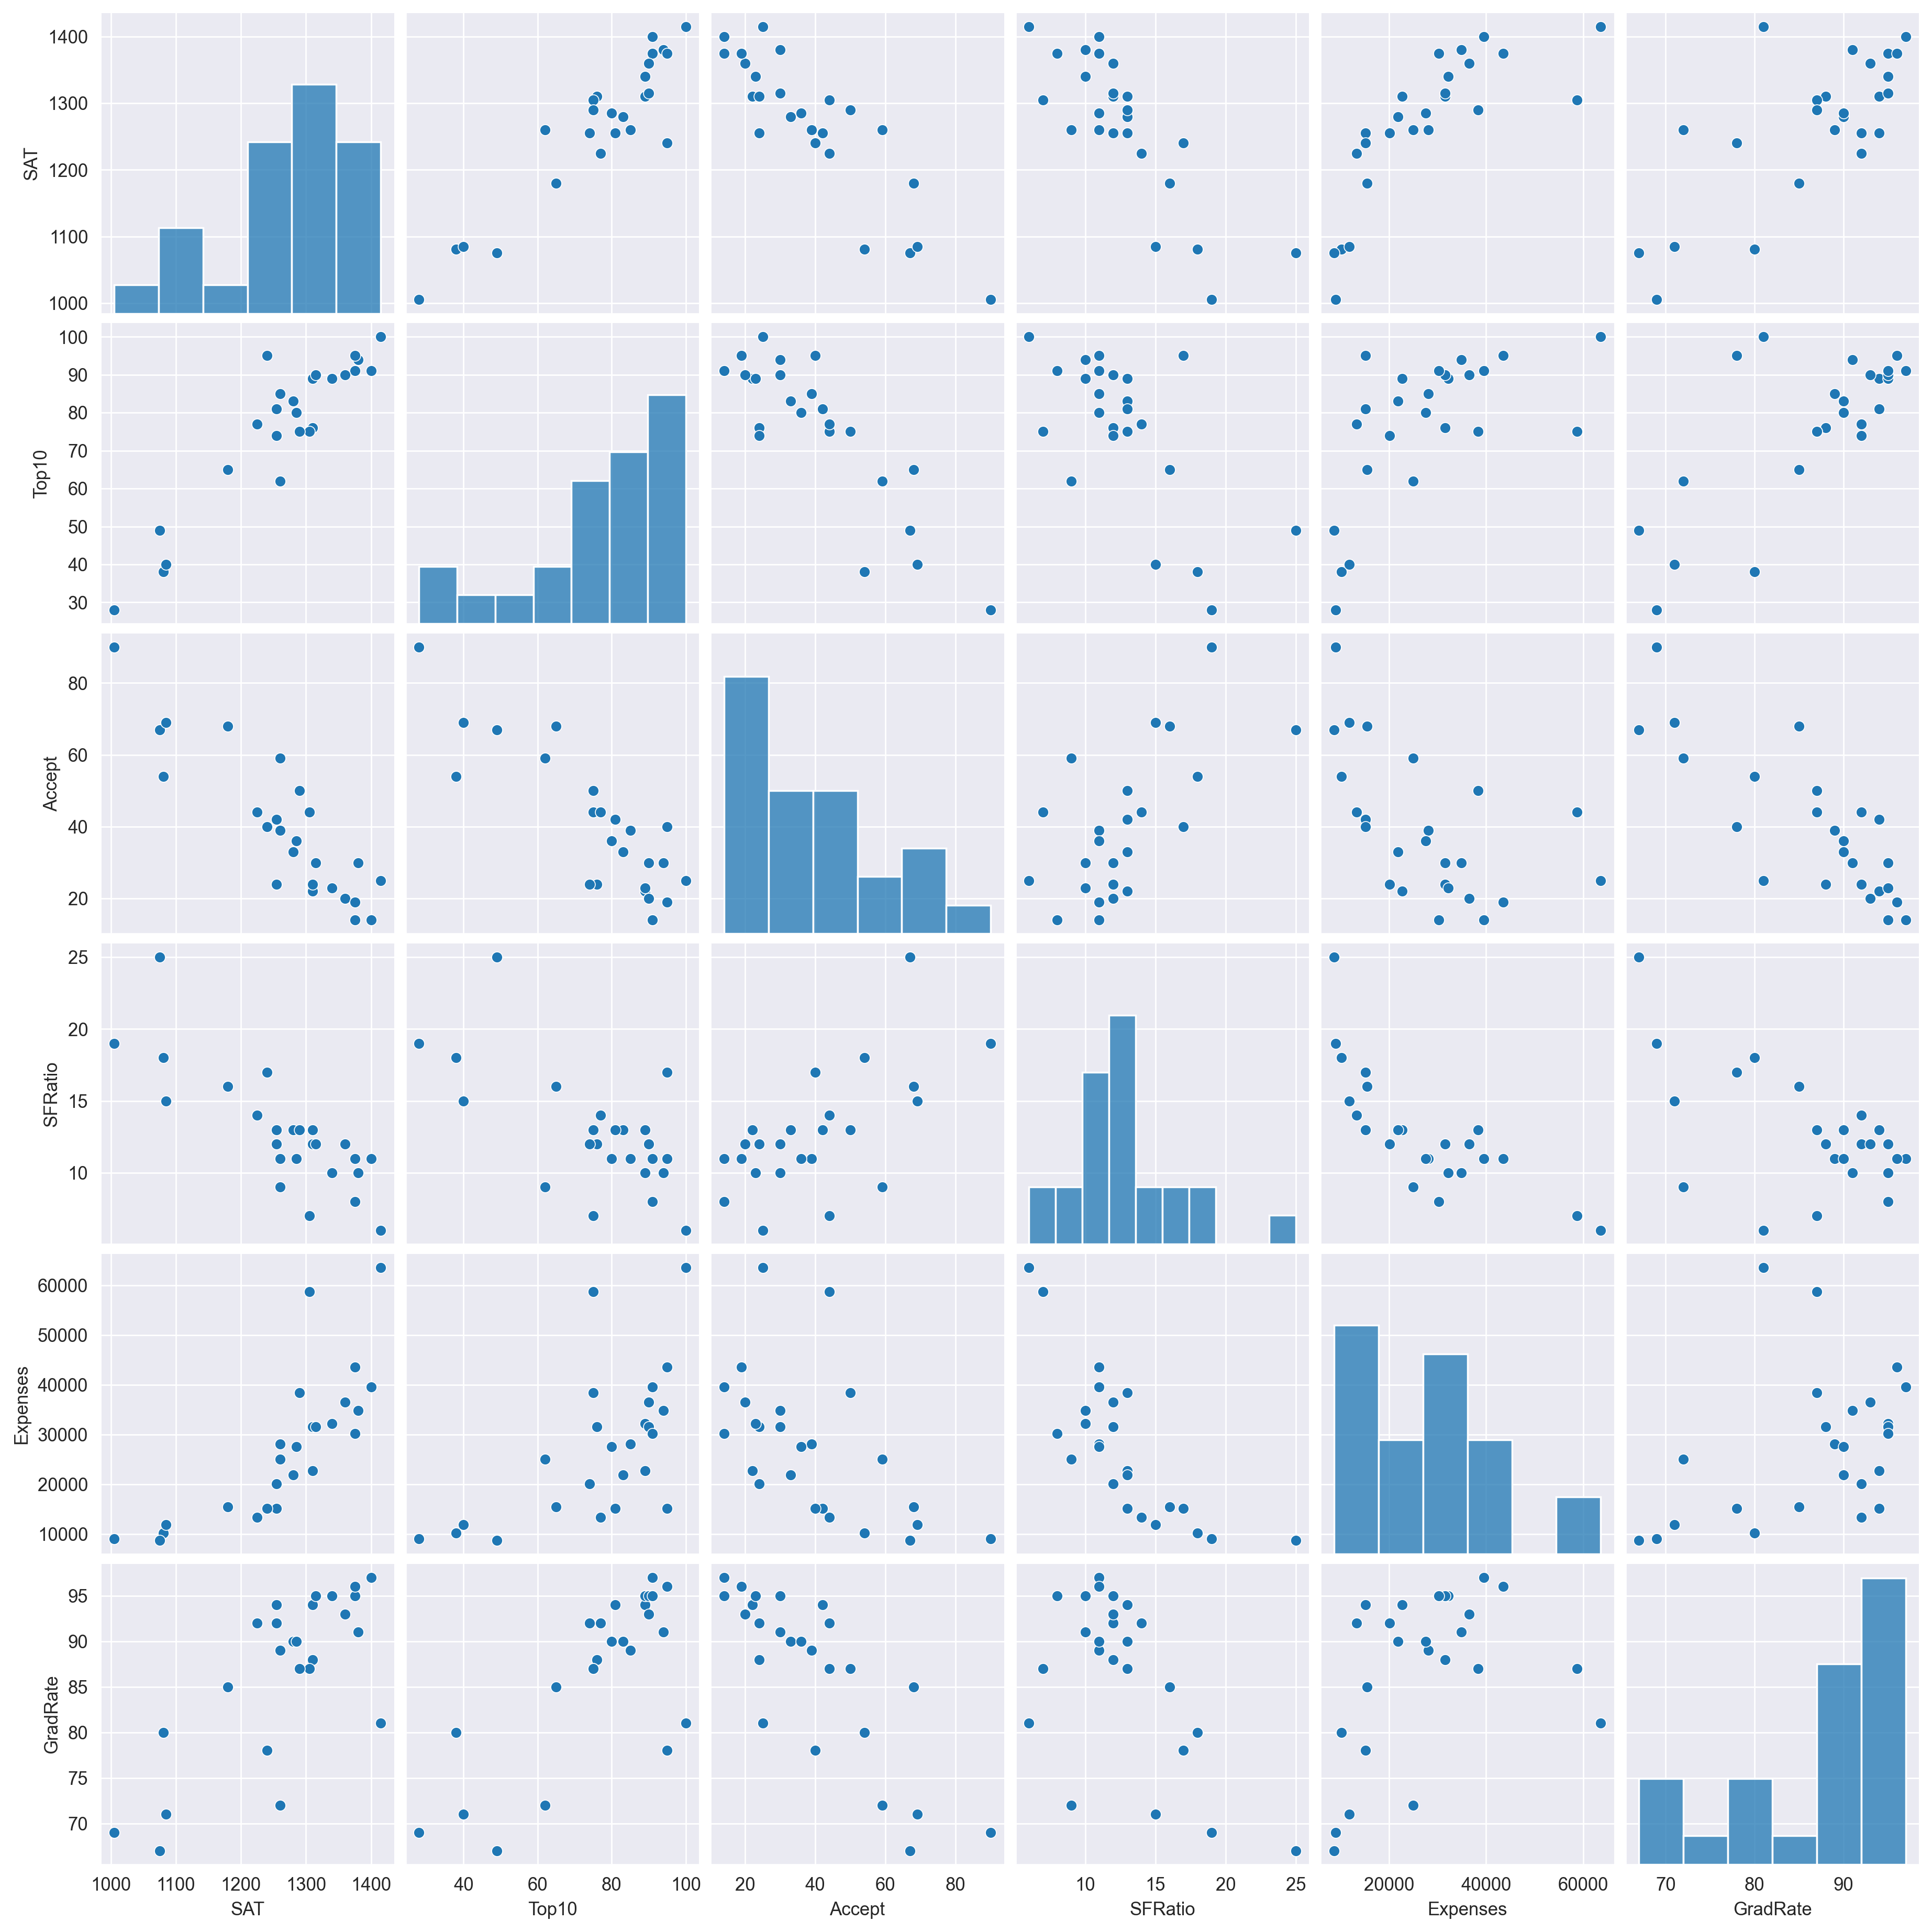

In [6]:
sns.pairplot(df)

## Feature Scaling

In [7]:
from sklearn.preprocessing import StandardScaler  # Standardization

In [8]:
sc = StandardScaler()

x = sc.fit_transform(df)
x

array([[ 0.41028362,  0.6575195 , -0.88986682,  0.07026045, -0.33141256,
         0.82030265],
       [ 1.39925928,  1.23521235, -0.73465749, -1.68625071,  2.56038138,
        -0.64452351],
       [-0.06065717, -0.76045386,  1.02438157, -0.93346022, -0.16712136,
        -1.65863393],
       [ 0.41028362, -0.02520842, -0.78639393, -0.18066972,  0.29164871,
         0.14422904],
       [ 0.12771914,  0.34241431, -0.32076595,  0.07026045, -0.39084607,
         0.36958691],
       [ 0.69284809,  0.6575195 , -0.83813038, -0.68253005,  0.33778044,
         0.93298158],
       [ 0.4573777 ,  0.71003703, -0.47597528, -0.18066972,  0.29695528,
         0.93298158],
       [-0.10775125, -0.13024348, -0.78639393, -0.18066972, -0.51381683,
         0.59494478],
       [ 1.25797704,  0.76255456, -1.30375836, -0.43159988,  0.85874344,
         1.15833946],
       [ 0.36318954, -0.07772595,  0.24833493, -1.43532055,  2.21481798,
         0.0315501 ],
       [ 1.06960072,  0.92010716, -0.47597528, -0.

In [9]:
# To create dendrogram
from scipy.cluster import hierarchy

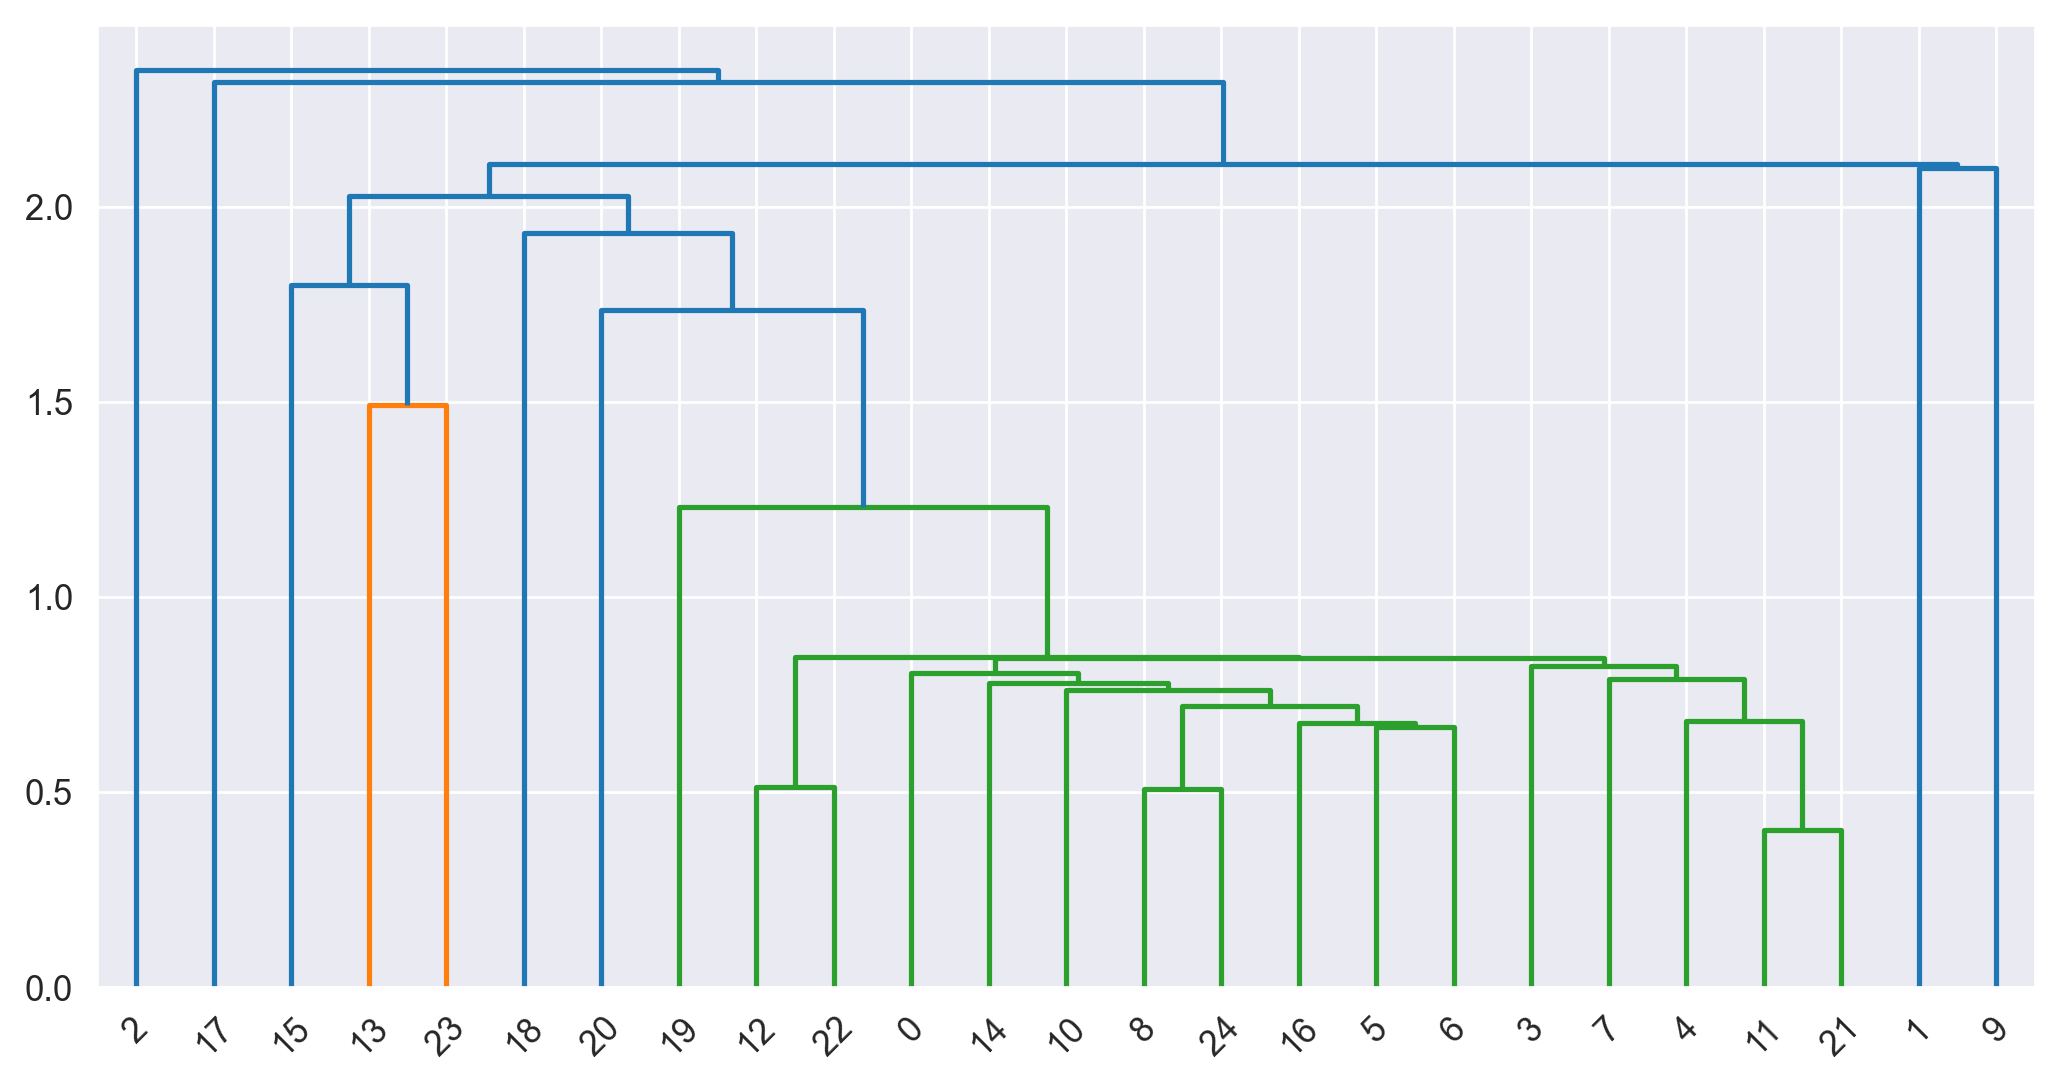

In [10]:
# Dentrogram using single linkage
lk = hierarchy.linkage(x,method='single')  # Create a dendrogram
dendrogram = hierarchy.dendrogram(lk)  # show dendrogram

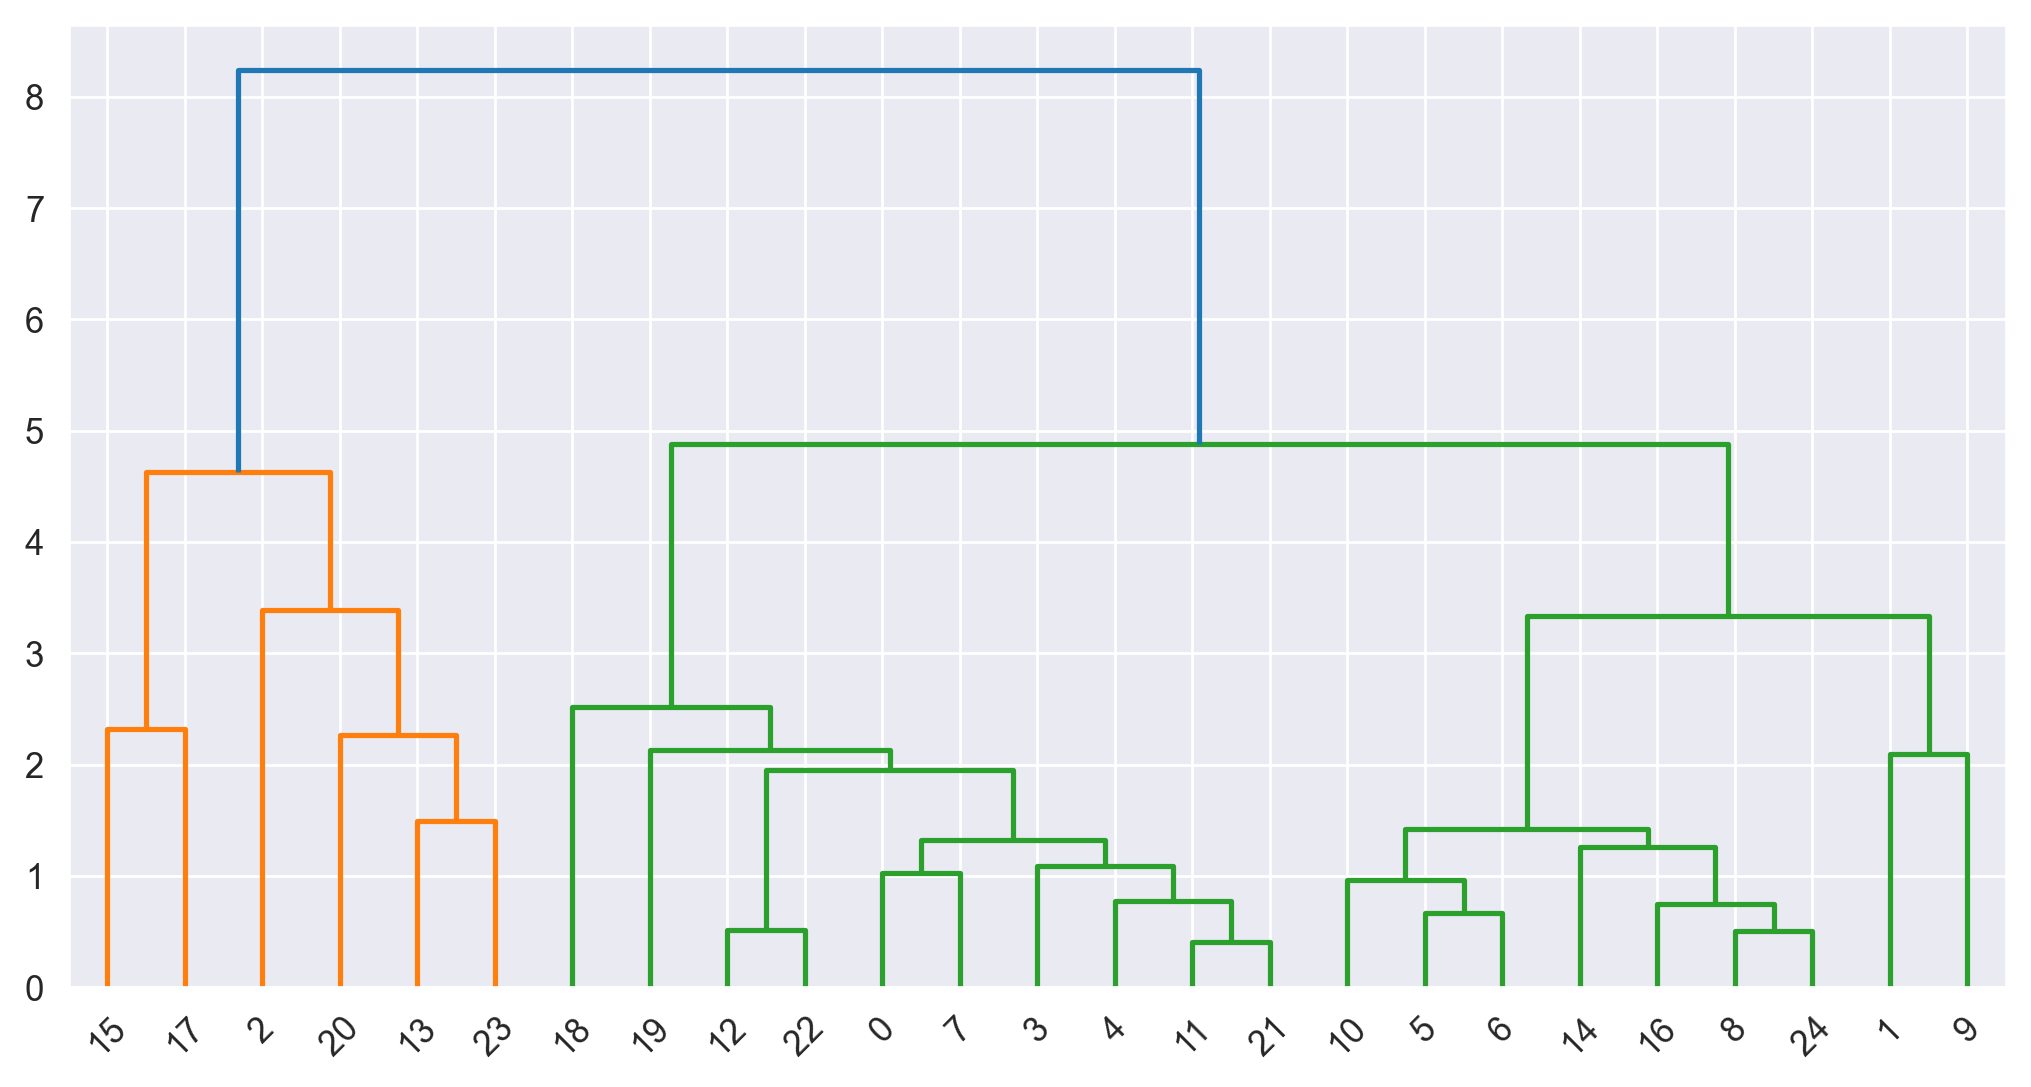

In [11]:
# Dendrogram with complete linkage
lk = hierarchy.linkage(x,method='complete')
dendrogram = hierarchy.dendrogram(lk)
# plt.axhline(y = 7 , c = 'red', linestyle = '--')

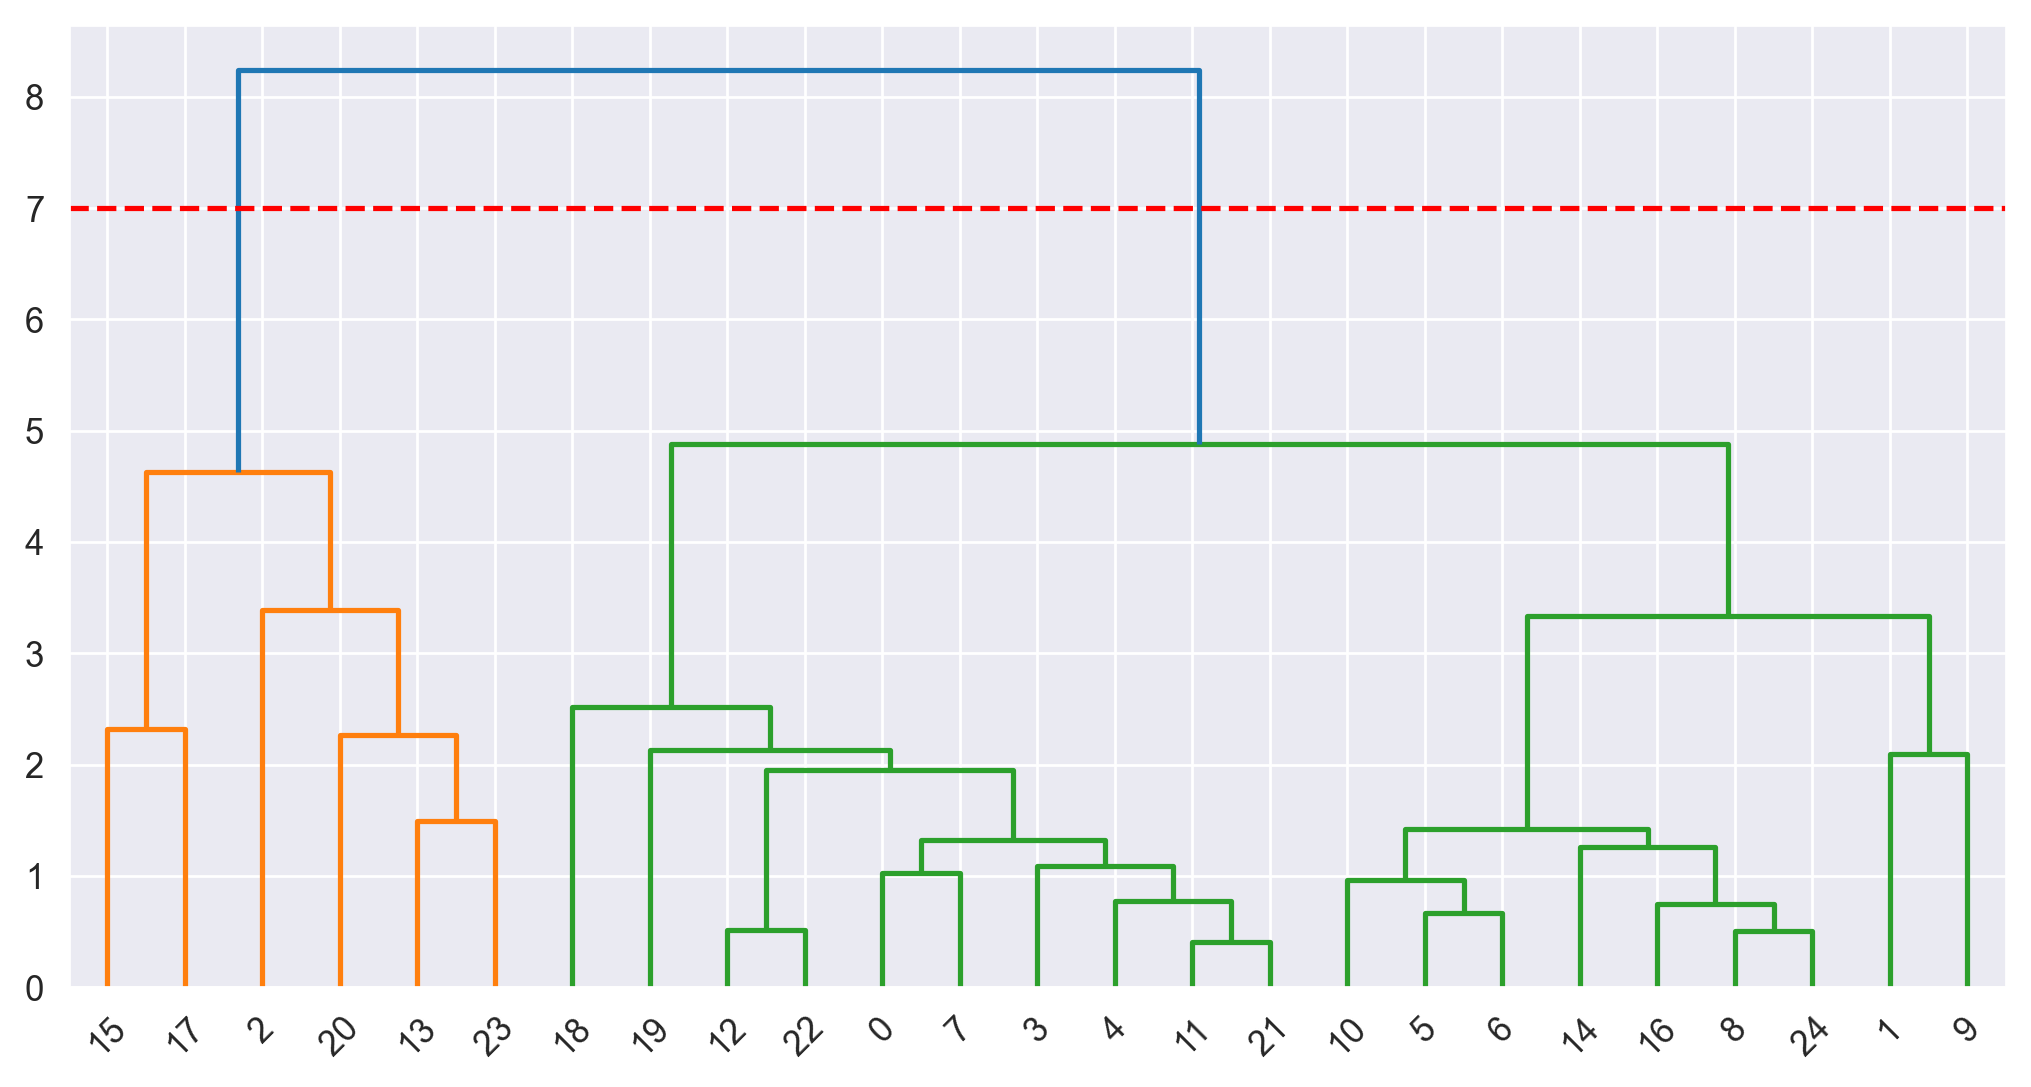

In [12]:
lk = hierarchy.linkage(x,method='complete')
dendrogram = hierarchy.dendrogram(lk)
plt.axhline(y = 7 , c = 'red', linestyle = '--')  # To create cut line

## Model Building

In [13]:
# To create cluster import class
from sklearn.cluster import AgglomerativeClustering

In [14]:
hc = AgglomerativeClustering(n_clusters=2)  # Create 2 cluster

y = hc.fit_predict(x) # fit calculate euclidean distance and predict gives labels of group, labels starts from 0

In [15]:
# 0 means group1 and 1 means group2
y  

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0], dtype=int64)

In [17]:
df['Cluster'] = y  
# create new column for which universities lies in which group
df

,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Cluster
0,1310,89,22,13,22704,94,0
1,1415,100,25,6,63575,81,0
2,1260,62,59,9,25026,72,0
3,1310,76,24,12,31510,88,0
4,1280,83,33,13,21864,90,0
5,1340,89,23,10,32162,95,0
6,1315,90,30,12,31585,95,0
7,1255,74,24,12,20126,92,0
8,1400,91,14,11,39525,97,0
9,1305,75,44,7,58691,87,0


In [18]:
df.groupby('Cluster').agg('mean')

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
Cluster,,,,,,
0,1305.47619,83.666667,33.333333,11.47619,30708.952381,89.571429
1,1061.50000,38.750000,70.000000,19.25000,9953.000000,71.750000


- All explenses college cluster together which are lies inside Group0
- All Affordable colleges cluster together which are lies inside Group1

<Axes: xlabel='Top10', ylabel='Expenses'>

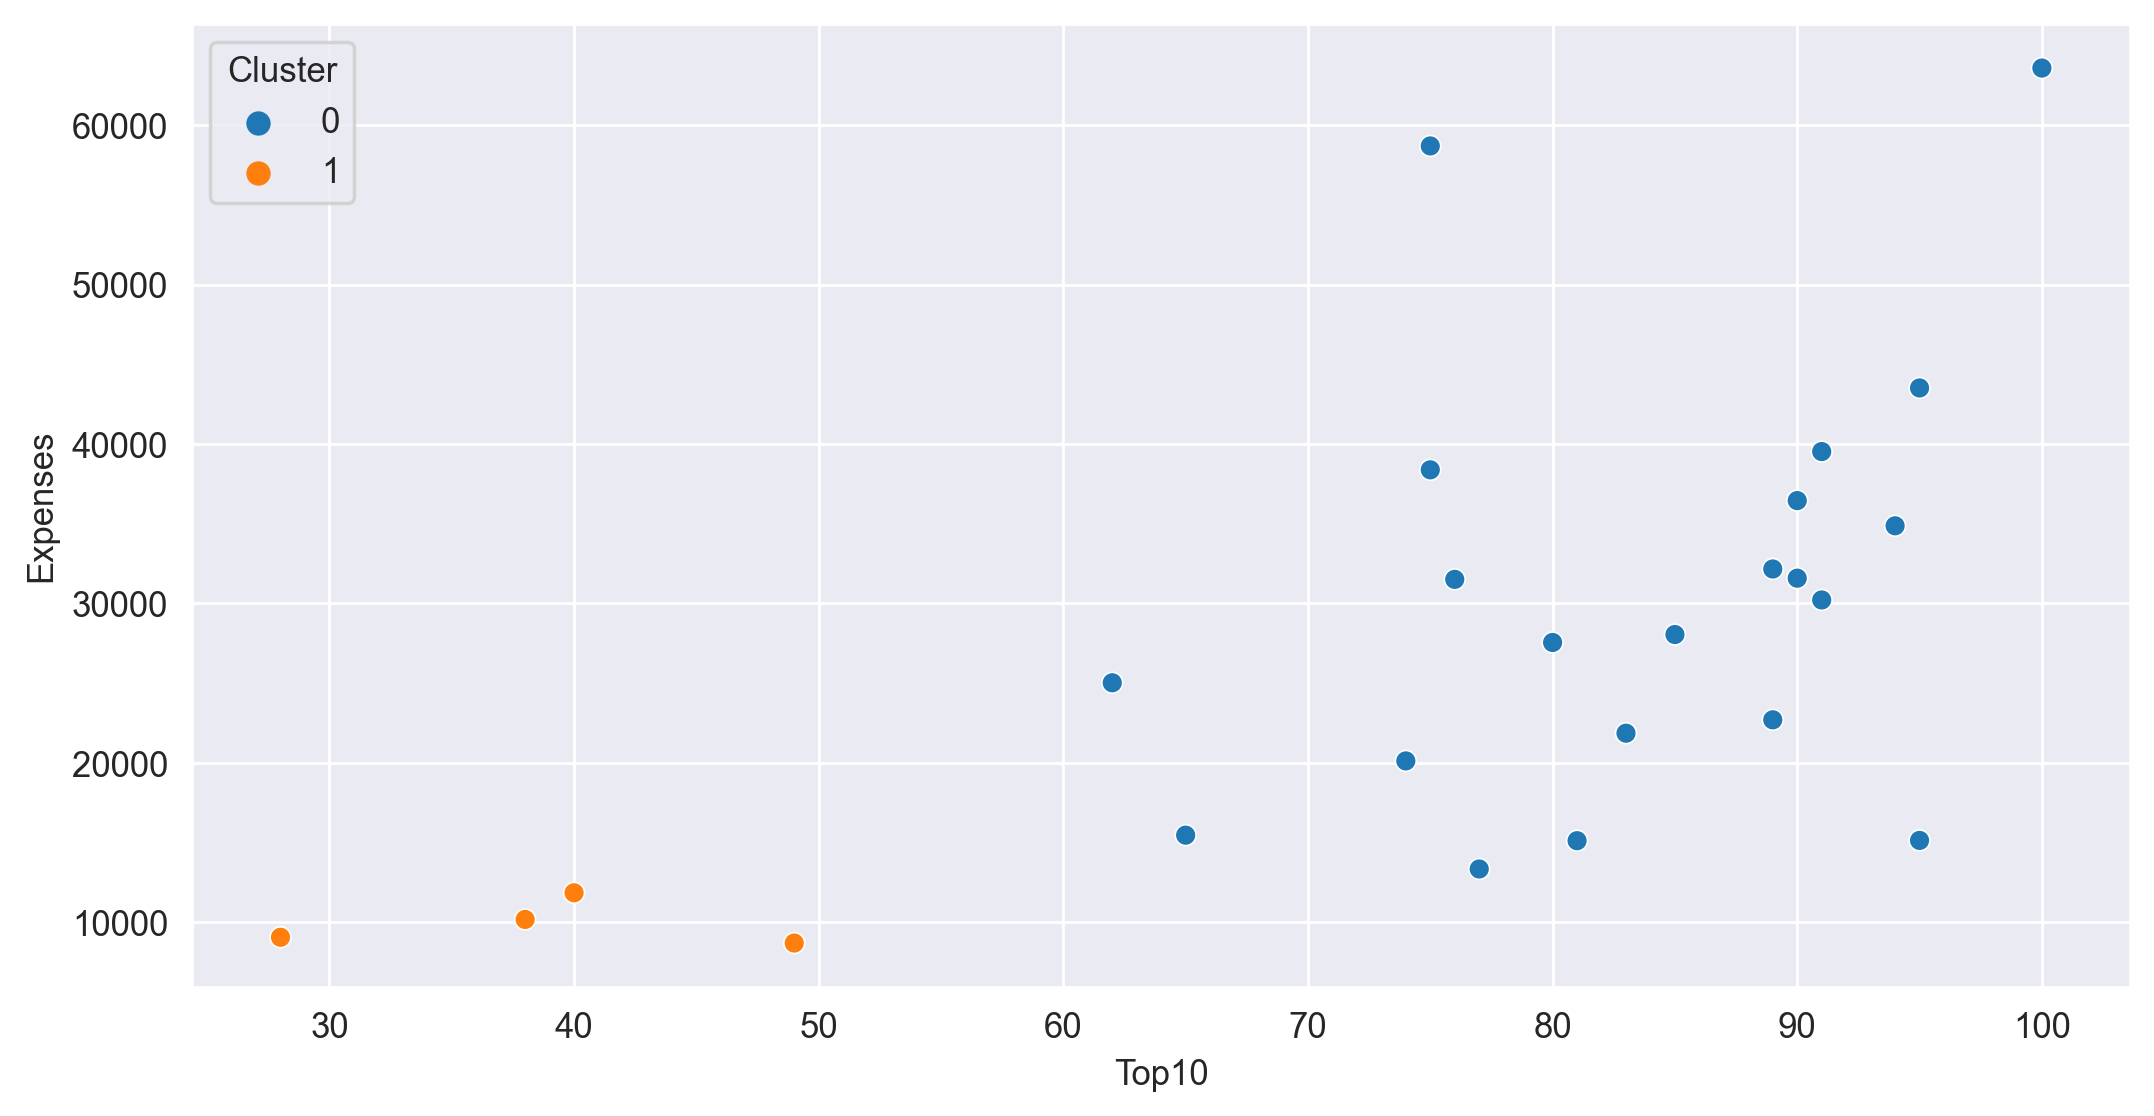

In [19]:
sns.scatterplot(x= df['Top10'], y=df['Expenses'], hue = df['Cluster'])

In [20]:
df[df['Cluster'] == 0]  # Univesities lies in group 0

,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Cluster
0,1310,89,22,13,22704,94,0
1,1415,100,25,6,63575,81,0
2,1260,62,59,9,25026,72,0
3,1310,76,24,12,31510,88,0
4,1280,83,33,13,21864,90,0
5,1340,89,23,10,32162,95,0
6,1315,90,30,12,31585,95,0
7,1255,74,24,12,20126,92,0
8,1400,91,14,11,39525,97,0
9,1305,75,44,7,58691,87,0


In [21]:
df[df['Cluster'] == 1]   # Univesities lies in group 1

,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Cluster
13,1081,38,54,18,10185,80,1
15,1005,28,90,19,9066,69,1
17,1075,49,67,25,8704,67,1
23,1085,40,69,15,11857,71,1


##  Cluster

In [22]:
data = pd.DataFrame(x)
data

,0,1,2,3,4,5
0,0.410284,0.657519,-0.889867,0.070260,-0.331413,0.820303
1,1.399259,1.235212,-0.734657,-1.686251,2.560381,-0.644524
2,-0.060657,-0.760454,1.024382,-0.933460,-0.167121,-1.658634
3,0.410284,-0.025208,-0.786394,-0.180670,0.291649,0.144229
4,0.127719,0.342414,-0.320766,0.070260,-0.390846,0.369587
5,0.692848,0.657519,-0.838130,-0.682530,0.337780,0.932982
6,0.457378,0.710037,-0.475975,-0.180670,0.296955,0.932982
7,-0.107751,-0.130243,-0.786394,-0.180670,-0.513817,0.594945
8,1.257977,0.762555,-1.303758,-0.431600,0.858743,1.158339
9,0.363190,-0.077726,0.248335,-1.435321,2.214818,0.031550


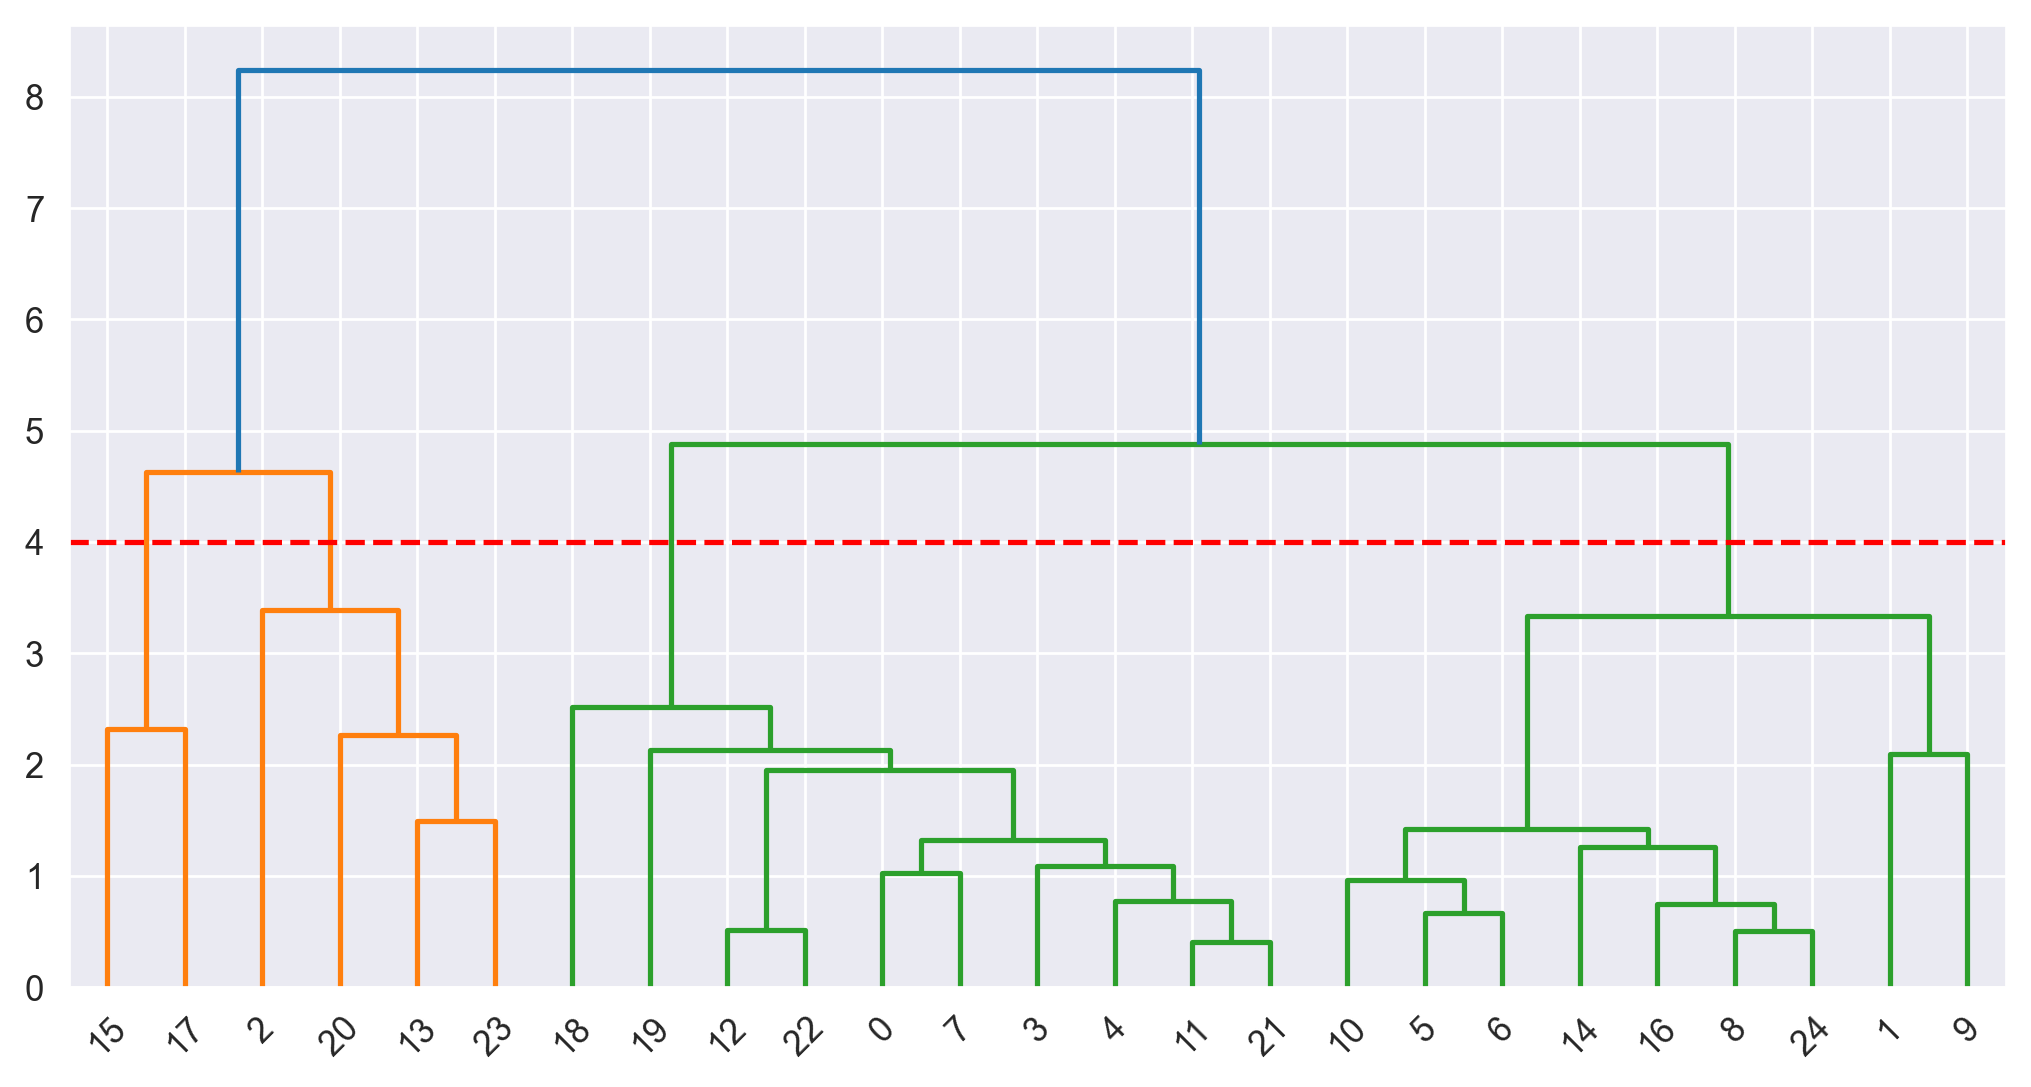

In [23]:
lk = hierarchy.linkage(data, method='complete')
dendrogram = hierarchy.dendrogram(lk)
plt.axhline(y = 4,c = 'red', linestyle = '--')

In [24]:
hc = AgglomerativeClustering(n_clusters=4)  # Create 4 clusters
y = hc.fit_predict(data)
y

array([0, 2, 0, 0, 0, 3, 3, 0, 3, 2, 3, 0, 0, 1, 3, 1, 3, 1, 0, 0, 0, 0,
       0, 1, 3], dtype=int64)

In [25]:
df['Cluster'] = y  # Create column for clusters
df

,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Cluster
0,1310,89,22,13,22704,94,0
1,1415,100,25,6,63575,81,2
2,1260,62,59,9,25026,72,0
3,1310,76,24,12,31510,88,0
4,1280,83,33,13,21864,90,0
5,1340,89,23,10,32162,95,3
6,1315,90,30,12,31585,95,3
7,1255,74,24,12,20126,92,0
8,1400,91,14,11,39525,97,3
9,1305,75,44,7,58691,87,2


In [27]:
df.groupby('Cluster').agg('mean')

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
Cluster,,,,,,
0,1262.500000,78.500000,40.083333,12.833333,22858.000000,87.583333
1,1061.500000,38.750000,70.000000,19.250000,9953.000000,71.750000
2,1360.000000,87.500000,34.500000,6.500000,61133.000000,84.000000
3,1363.571429,91.428571,21.428571,10.571429,35475.142857,94.571429


<Axes: xlabel='Top10', ylabel='Expenses'>

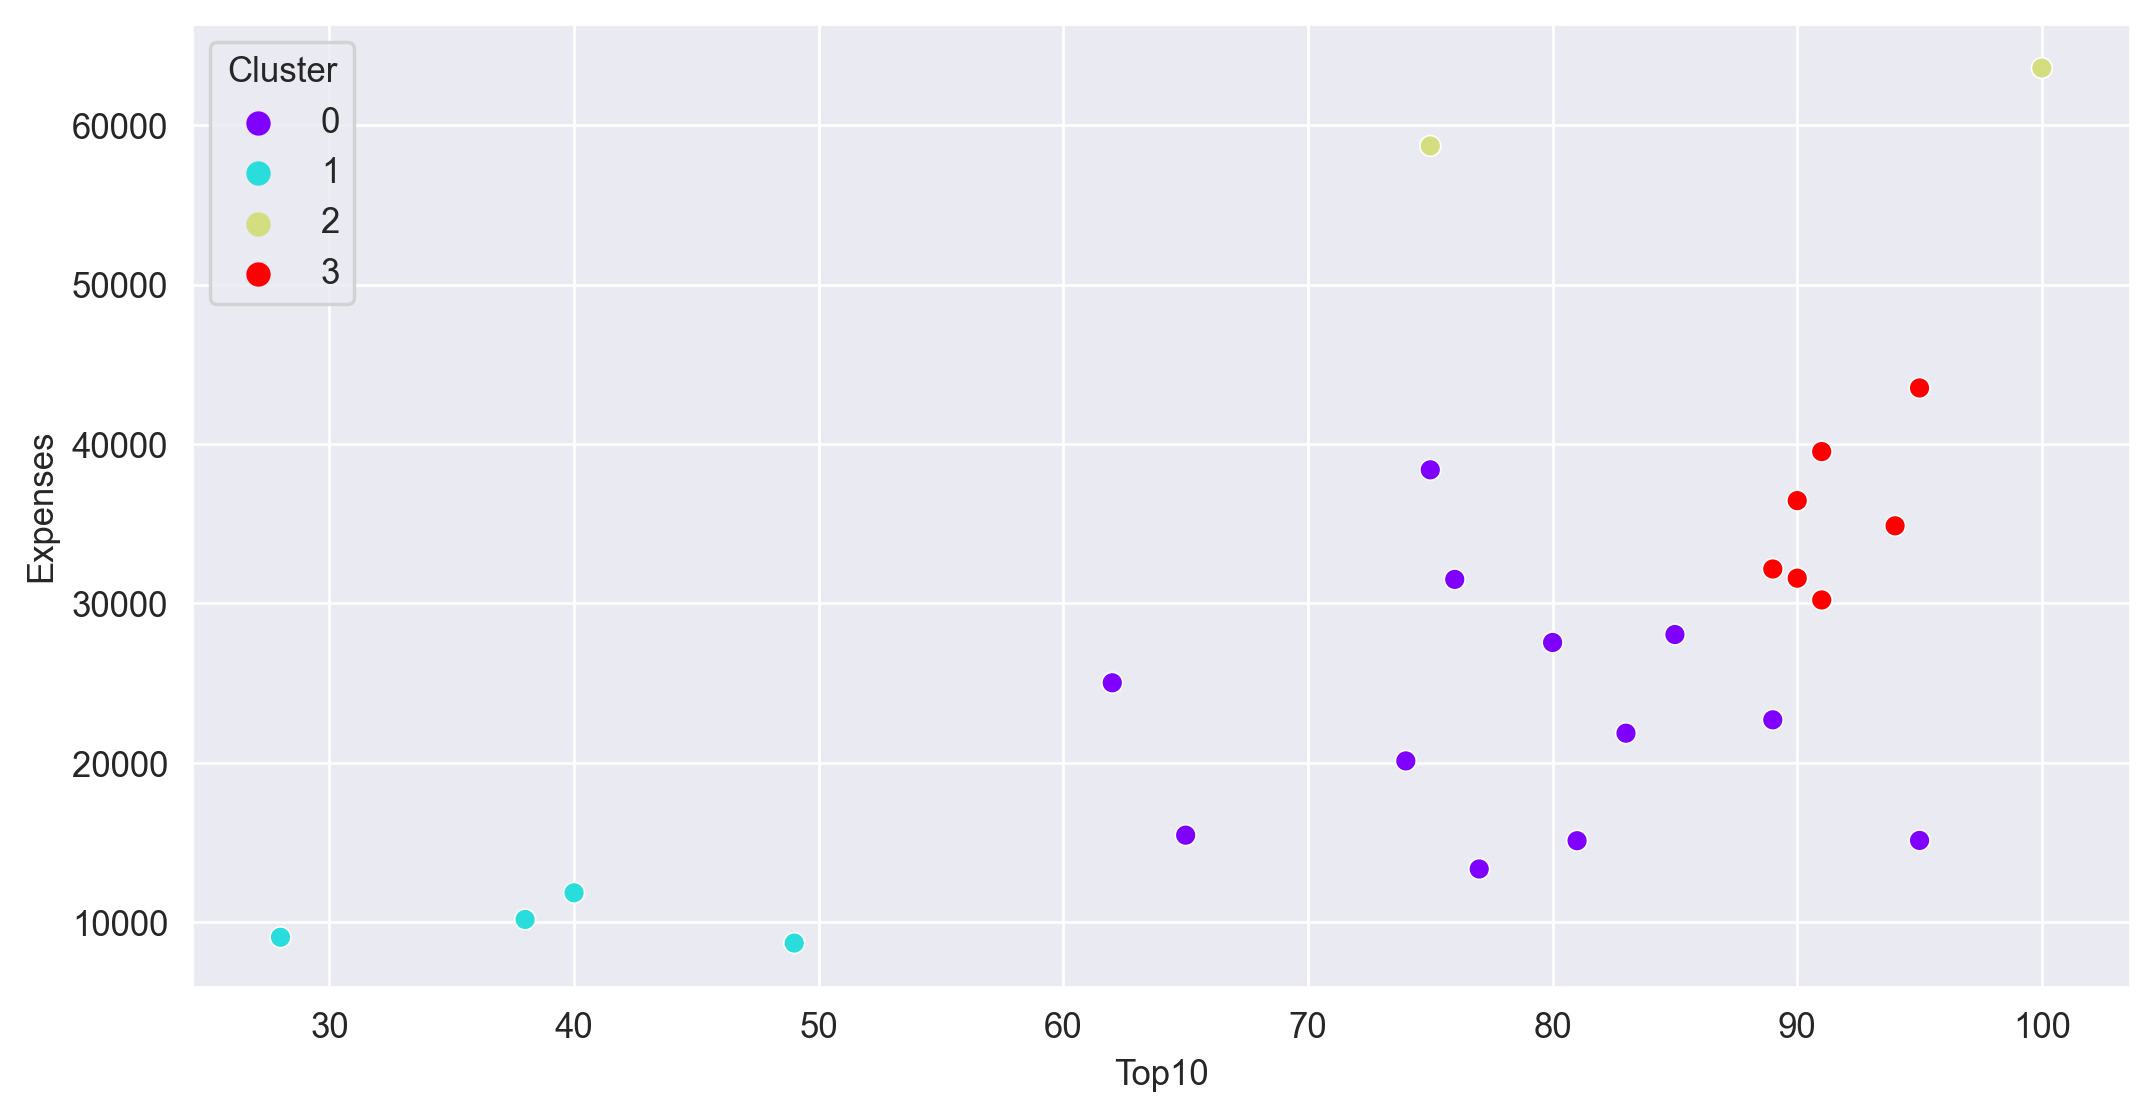

In [28]:
sns.scatterplot(x=df['Top10'],y= df['Expenses'], hue = df['Cluster'], palette='rainbow')

In [29]:
df[df['Cluster'] == 0]

,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Cluster
0,1310,89,22,13,22704,94,0
2,1260,62,59,9,25026,72,0
3,1310,76,24,12,31510,88,0
4,1280,83,33,13,21864,90,0
7,1255,74,24,12,20126,92,0
11,1260,85,39,11,28052,89,0
12,1255,81,42,13,15122,94,0
18,1240,95,40,17,15140,78,0
19,1290,75,50,13,38380,87,0
20,1180,65,68,16,15470,85,0


In [30]:
df[df['Cluster'] == 1]

,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Cluster
13,1081,38,54,18,10185,80,1
15,1005,28,90,19,9066,69,1
17,1075,49,67,25,8704,67,1
23,1085,40,69,15,11857,71,1


In [31]:
df[df['Cluster'] == 2]

,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Cluster
1,1415,100,25,6,63575,81,2
9,1305,75,44,7,58691,87,2


In [32]:
df[df['Cluster'] == 3]

,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Cluster
5,1340,89,23,10,32162,95,3
6,1315,90,30,12,31585,95,3
8,1400,91,14,11,39525,97,3
10,1380,94,30,10,34870,91,3
14,1375,91,14,8,30220,95,3
16,1360,90,20,12,36450,93,3
24,1375,95,19,11,43514,96,3
